# Example Usage

This is a basic example using the torchvision COCO dataset from coco.py, it assumes that you've already downloaded the COCO images and annotations JSON.  You'll notice that the scale augmentations are quite extreme.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
import numpy as np
from simple_copy_paste import CopyPaste
from coco import CocoDetectionCP
from vizualise import display_instances
import albumentations as A
import random
from matplotlib import pyplot as plt

In [7]:
transform = A.Compose(
    [
        A.RandomScale(
            scale_limit=(-0.9, 1), p=1
        ),  # LargeScaleJitter from scale of 0.1 to 2
        A.PadIfNeeded(
            256, 256, border_mode=0
        ),  # pads with image in the center, not the top left like the paper
        A.RandomCrop(256, 256),
        CopyPaste(
            blend=True, sigma=1, pct_objects_paste=0.8, p=1.0
        ),  # pct_objects_paste is a guess
    ],
    bbox_params=A.BboxParams(format="coco", min_visibility=0.05),
)

data = CocoDetectionCP(
    "../data/val2017",
    "../data/annotations/instances_val2017.json",
    transform,
)

loading annotations into memory...
Done (t=0.34s)
creating index...
index created!


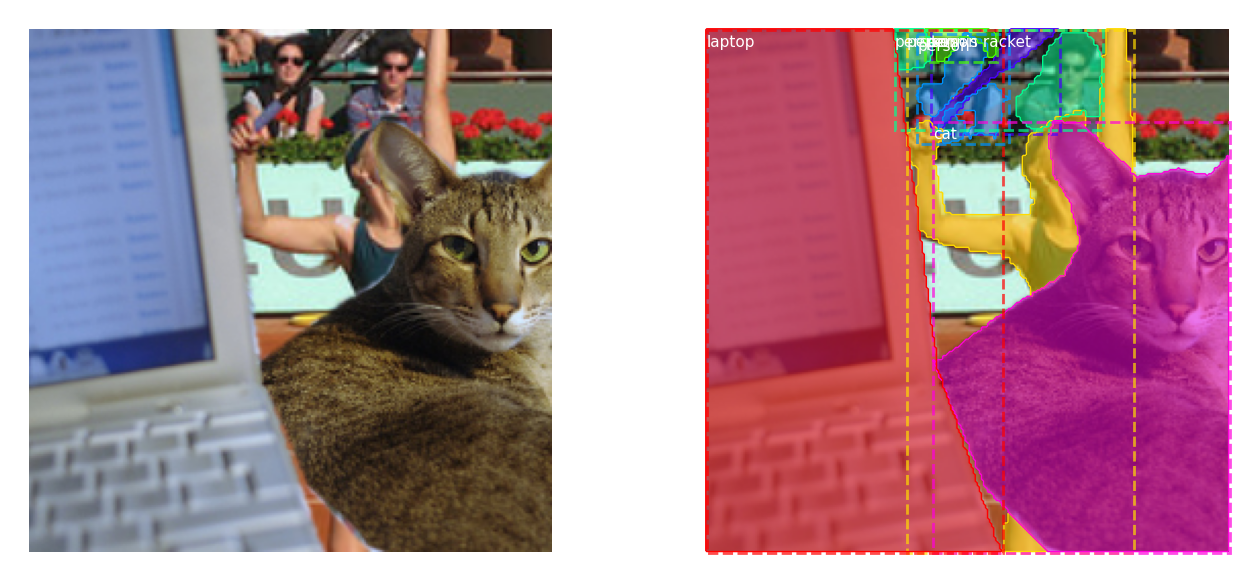

In [31]:
f, ax = plt.subplots(1, 2, figsize=(16, 16))

index = random.randint(0, len(data))
img_data = data[index]
image = img_data["image"]
masks = img_data["masks"]
bboxes = img_data["bboxes"]

empty = np.array([])
display_instances(
    image, empty, empty, empty, empty, show_mask=False, show_bbox=False, ax=ax[0]
)

if len(bboxes) > 0:
    boxes = np.stack([b[:4] for b in bboxes], axis=0)
    box_classes = np.array([b[-2] for b in bboxes])
    mask_indices = np.array([b[-1] for b in bboxes])
    show_masks = np.stack(masks, axis=-1)[..., mask_indices]
    class_names = {k: data.coco.cats[k]["name"] for k in data.coco.cats.keys()}
    display_instances(
        image, boxes, show_masks, box_classes, class_names, show_bbox=True, ax=ax[1]
    )
else:
    display_instances(
        image, empty, empty, empty, empty, show_mask=False, show_bbox=False, ax=ax[1]
    )